In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def activation_func(x):
    # Наша функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

In [93]:
def deriv_activation_func(x):
    # Производная от sigmoid: f'(x) = f(x) * (1 - f(x))
    fx = activation_func(x)
    return fx * (1 - fx)

In [94]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
 
    def feedforward(self, inputs):
        # Вводные данные о весе, добавление смещения 
        # и последующее использование функции активации
 
        total = np.dot(self.weights, inputs) + self.bias
        return activation_func(total)

In [95]:
weights = np.array([0, 1])  # w1 = 0, w2 = 1
bias = 4  # b = 4
n = Neuron(weights, bias)
 
x = np.array([2, 3])  # x1 = 2, x2 = 3
print(n.feedforward(x))  # 0.9990889488055994

0.9990889488055994


In [96]:
class OurNeuralNetwork:
    """
    Нейронная сеть, у которой:
        - 2 входа
        - скрытый слой с двумя нейронами (h1, h2)
        - слой вывода с одним нейроном (o1)
 
    *** ВАЖНО ***:
    Код ниже написан как простой, образовательный. НЕ оптимальный.
    Настоящий код нейронной сети выглядит не так. НЕ ИСПОЛЬЗУЙТЕ этот код.
    Вместо этого, прочитайте/запустите его, чтобы понять, как работает эта сеть.
    """
    def __init__(self):
        # Вес
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
 
        # Смещения
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
 
    def feedforward(self, x):
        # x является массивом numpy с двумя элементами
        h1 = activation_func(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        h2 = activation_func(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = activation_func(self.w5 * h1 + self.w6 * h2 + self.b3)
        return o1
 
    def train(self, data, all_y_trues):
        """
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array with n elements.
            Elements in all_y_trues correspond to those in data.
        """
        learn_rate = 0.1
        epochs = 10000 # количество циклов во всём наборе данных
 
        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # --- Выполняем обратную связь (нам понадобятся эти значения в дальнейшем)
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                h1 = activation_func(sum_h1)
 
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                h2 = activation_func(sum_h2)
 
                sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
                o1 = activation_func(sum_o1)
                y_pred = o1
 
                # --- Подсчет частных производных
                # --- Наименование: d_L_d_w1 представляет "частично L / частично w1"
                d_L_d_ypred = -2 * (y_true - y_pred)
 
                # Нейрон o1
                d_ypred_d_w5 = h1 * deriv_activation_func(sum_o1)
                d_ypred_d_w6 = h2 * deriv_activation_func(sum_o1)
                d_ypred_d_b3 = deriv_activation_func(sum_o1)
 
                d_ypred_d_h1 = self.w5 * deriv_activation_func(sum_o1)
                d_ypred_d_h2 = self.w6 * deriv_activation_func(sum_o1)
 
                # Нейрон h1
                d_h1_d_w1 = x[0] * deriv_activation_func(sum_h1)
                d_h1_d_w2 = x[1] * deriv_activation_func(sum_h1)
                d_h1_d_b1 = deriv_activation_func(sum_h1)
 
                # Нейрон h2
                d_h2_d_w3 = x[0] * deriv_activation_func(sum_h2)
                d_h2_d_w4 = x[1] * deriv_activation_func(sum_h2)
                d_h2_d_b2 = deriv_activation_func(sum_h2)
 
                # --- Обновляем вес и смещения
                # Нейрон h1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
 
                # Нейрон h2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
 
                # Нейрон o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3
 
            # --- Подсчитываем общую потерю в конце каждой фазы
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                print("Epoch %d loss: %.3f" % (epoch, loss))

In [97]:
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))  # 0.7216325609518421

0.4541506263100055


In [98]:
def mse_loss(y_true, y_pred):
    # y_true и y_pred являются массивами numpy с одинаковой длиной
    return ((y_true - y_pred) ** 2).mean()

In [99]:
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])
 
print(mse_loss(y_true, y_pred))  # 0.5

0.5


In [100]:
data = np.array([
    [36, 1],    # 36 градусов, есть солнце 
    [37, 1],    # 37 градусов, есть солнце
    [36, 0],    # 36 градусов, нет солнца
    [37, 0],    # 37 градусов, нет солнца
])
 
all_y_trues = np.array([
    1, # открыты
    0, # закрыты
    0, # закрыты
    0, # закрыты
])

In [101]:
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.188
Epoch 10 loss: 0.188
Epoch 20 loss: 0.188
Epoch 30 loss: 0.188
Epoch 40 loss: 0.188
Epoch 50 loss: 0.188
Epoch 60 loss: 0.188
Epoch 70 loss: 0.188
Epoch 80 loss: 0.188
Epoch 90 loss: 0.188
Epoch 100 loss: 0.188
Epoch 110 loss: 0.188
Epoch 120 loss: 0.188
Epoch 130 loss: 0.188
Epoch 140 loss: 0.188
Epoch 150 loss: 0.188
Epoch 160 loss: 0.188
Epoch 170 loss: 0.188
Epoch 180 loss: 0.188
Epoch 190 loss: 0.188
Epoch 200 loss: 0.188
Epoch 210 loss: 0.188
Epoch 220 loss: 0.188
Epoch 230 loss: 0.188
Epoch 240 loss: 0.188
Epoch 250 loss: 0.188
Epoch 260 loss: 0.188
Epoch 270 loss: 0.188
Epoch 280 loss: 0.188
Epoch 290 loss: 0.188
Epoch 300 loss: 0.188
Epoch 310 loss: 0.188
Epoch 320 loss: 0.188
Epoch 330 loss: 0.188
Epoch 340 loss: 0.188
Epoch 350 loss: 0.188
Epoch 360 loss: 0.188
Epoch 370 loss: 0.188
Epoch 380 loss: 0.188
Epoch 390 loss: 0.188
Epoch 400 loss: 0.188
Epoch 410 loss: 0.188
Epoch 420 loss: 0.188
Epoch 430 loss: 0.188
Epoch 440 loss: 0.188
Epoch 450 loss: 0.188

In [102]:
feedforwardsNoSun = []
sun = 0
for C in range(0, 51):
    feedforwardsNoSun.append(network.feedforward([C, sun]))
feedforwardsSun = []
sun = 1
for C in range(0, 51):
    feedforwardsSun.append(network.feedforward([C, sun]))

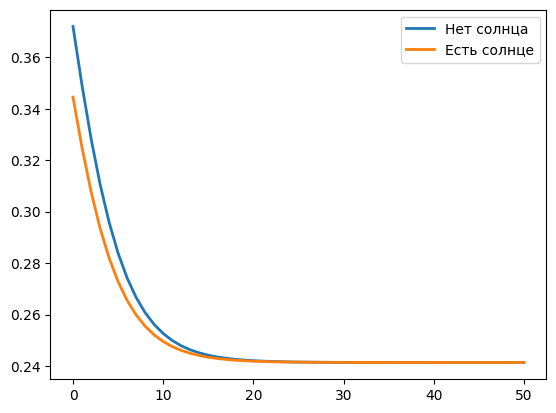

In [103]:
fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце' )
ax.legend()
plt.show()

Видно, что нейронная сеть не обучилась. Попробую добавить больше входных данных

In [104]:
# создаю датасет с данными температуры от 26 до 47 
dataset = [[[i, 1], 1 if i <= 36 else 0] for i in range(26, 47)]
dataset += [[[i, 0], 0] for i in range(26, 47)]
data = np.array([i[0] for i in dataset])
all_y_trues = np.array([i[1] for i in dataset])

In [105]:
dataset, data, all_y_trues

([[[26, 1], 1],
  [[27, 1], 1],
  [[28, 1], 1],
  [[29, 1], 1],
  [[30, 1], 1],
  [[31, 1], 1],
  [[32, 1], 1],
  [[33, 1], 1],
  [[34, 1], 1],
  [[35, 1], 1],
  [[36, 1], 1],
  [[37, 1], 0],
  [[38, 1], 0],
  [[39, 1], 0],
  [[40, 1], 0],
  [[41, 1], 0],
  [[42, 1], 0],
  [[43, 1], 0],
  [[44, 1], 0],
  [[45, 1], 0],
  [[46, 1], 0],
  [[26, 0], 0],
  [[27, 0], 0],
  [[28, 0], 0],
  [[29, 0], 0],
  [[30, 0], 0],
  [[31, 0], 0],
  [[32, 0], 0],
  [[33, 0], 0],
  [[34, 0], 0],
  [[35, 0], 0],
  [[36, 0], 0],
  [[37, 0], 0],
  [[38, 0], 0],
  [[39, 0], 0],
  [[40, 0], 0],
  [[41, 0], 0],
  [[42, 0], 0],
  [[43, 0], 0],
  [[44, 0], 0],
  [[45, 0], 0],
  [[46, 0], 0]],
 array([[26,  1],
        [27,  1],
        [28,  1],
        [29,  1],
        [30,  1],
        [31,  1],
        [32,  1],
        [33,  1],
        [34,  1],
        [35,  1],
        [36,  1],
        [37,  1],
        [38,  1],
        [39,  1],
        [40,  1],
        [41,  1],
        [42,  1],
        [43,  1],
   

In [106]:
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.529
Epoch 10 loss: 0.199
Epoch 20 loss: 0.199
Epoch 30 loss: 0.199
Epoch 40 loss: 0.199
Epoch 50 loss: 0.199
Epoch 60 loss: 0.199
Epoch 70 loss: 0.199
Epoch 80 loss: 0.199
Epoch 90 loss: 0.199
Epoch 100 loss: 0.199
Epoch 110 loss: 0.199
Epoch 120 loss: 0.199
Epoch 130 loss: 0.199
Epoch 140 loss: 0.199
Epoch 150 loss: 0.199
Epoch 160 loss: 0.199
Epoch 170 loss: 0.199
Epoch 180 loss: 0.199
Epoch 190 loss: 0.199
Epoch 200 loss: 0.199
Epoch 210 loss: 0.199
Epoch 220 loss: 0.199
Epoch 230 loss: 0.199
Epoch 240 loss: 0.199
Epoch 250 loss: 0.199
Epoch 260 loss: 0.199
Epoch 270 loss: 0.199
Epoch 280 loss: 0.199
Epoch 290 loss: 0.199
Epoch 300 loss: 0.199
Epoch 310 loss: 0.199
Epoch 320 loss: 0.199
Epoch 330 loss: 0.199
Epoch 340 loss: 0.199
Epoch 350 loss: 0.199
Epoch 360 loss: 0.199
Epoch 370 loss: 0.199
Epoch 380 loss: 0.199
Epoch 390 loss: 0.199
Epoch 400 loss: 0.199
Epoch 410 loss: 0.199
Epoch 420 loss: 0.199
Epoch 430 loss: 0.199
Epoch 440 loss: 0.199
Epoch 450 loss: 0.199

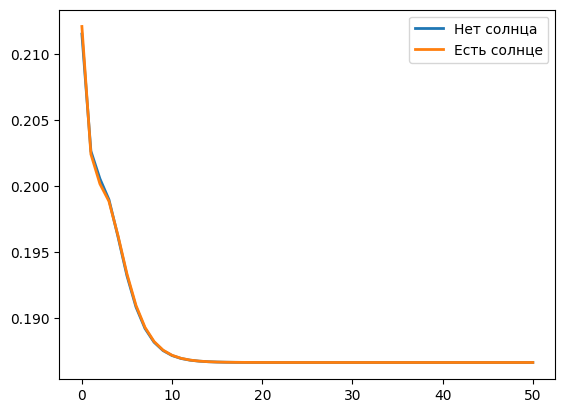

In [107]:
feedforwardsNoSun = []
sun = 0
for C in range(0, 51):
    feedforwardsNoSun.append(network.feedforward([C, sun]))
feedforwardsSun = []
sun = 1
for C in range(0, 51):
    feedforwardsSun.append(network.feedforward([C, sun]))
fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце' )
ax.legend()

plt.show()

Epoch 0 loss: 0.668
Epoch 10 loss: 0.193
Epoch 20 loss: 0.194
Epoch 30 loss: 0.194
Epoch 40 loss: 0.194
Epoch 50 loss: 0.194
Epoch 60 loss: 0.194
Epoch 70 loss: 0.194
Epoch 80 loss: 0.194
Epoch 90 loss: 0.194
Epoch 100 loss: 0.194
Epoch 110 loss: 0.194
Epoch 120 loss: 0.194
Epoch 130 loss: 0.194
Epoch 140 loss: 0.194
Epoch 150 loss: 0.194
Epoch 160 loss: 0.194
Epoch 170 loss: 0.194
Epoch 180 loss: 0.194
Epoch 190 loss: 0.194
Epoch 200 loss: 0.194
Epoch 210 loss: 0.194
Epoch 220 loss: 0.194
Epoch 230 loss: 0.194
Epoch 240 loss: 0.194
Epoch 250 loss: 0.194
Epoch 260 loss: 0.194
Epoch 270 loss: 0.196
Epoch 280 loss: 0.195
Epoch 290 loss: 0.195
Epoch 300 loss: 0.195
Epoch 310 loss: 0.195
Epoch 320 loss: 0.195
Epoch 330 loss: 0.195
Epoch 340 loss: 0.195
Epoch 350 loss: 0.195
Epoch 360 loss: 0.195
Epoch 370 loss: 0.195
Epoch 380 loss: 0.195
Epoch 390 loss: 0.195
Epoch 400 loss: 0.195
Epoch 410 loss: 0.195
Epoch 420 loss: 0.195
Epoch 430 loss: 0.195
Epoch 440 loss: 0.195
Epoch 450 loss: 0.195

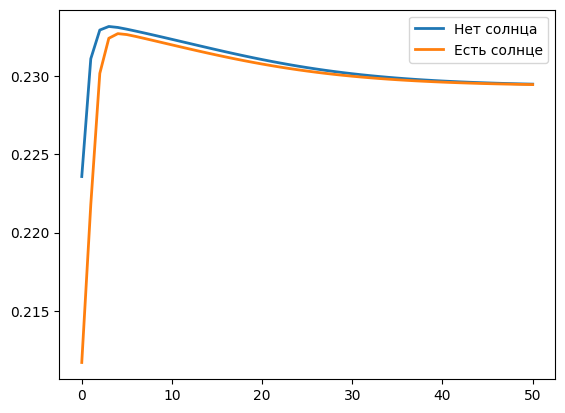

In [108]:
# создаю датасет с данными температуры от 26 до 47 
dataset = [[[i, 1], 1 if i <= 36 else 0] for i in range(26, 47)]
dataset += [[[i, 0], 0] for i in range(26, 47)]
data = np.array([i[0] for i in dataset])
all_y_trues = np.array([i[1] for i in dataset])
dataset, data, all_y_trues
network = OurNeuralNetwork()
network.train(data, all_y_trues)
feedforwardsNoSun = []
sun = 0
for C in range(0, 51):
    feedforwardsNoSun.append(network.feedforward([C, sun]))
feedforwardsSun = []
sun = 1
for C in range(0, 51):
    feedforwardsSun.append(network.feedforward([C, sun]))
fig, ax = plt.subplots()

ax.plot([C for C in range(0, 51)], feedforwardsNoSun, linewidth=2.0, label='Нет солнца')

ax.plot([C for C in range(0, 51)], feedforwardsSun, linewidth=2.0, label='Есть солнце' )
ax.legend()
plt.show()

In [109]:
data = np.array([
    [0, 1],  # 36 градусов, есть солнце 
    [1, 1],  # 37 градусов, есть солнце
    [0, 0],  # 36 градусов, нет солнца
    [1, 0],  # 37 градусов, нет солнца
])

all_y_trues = np.array([
    1,  # открыты
    0,  # закрыты
    0,  # закрыты
    0,  # закрыты
])
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.227
Epoch 10 loss: 0.173
Epoch 20 loss: 0.161
Epoch 30 loss: 0.155
Epoch 40 loss: 0.149
Epoch 50 loss: 0.144
Epoch 60 loss: 0.138
Epoch 70 loss: 0.133
Epoch 80 loss: 0.127
Epoch 90 loss: 0.121
Epoch 100 loss: 0.116
Epoch 110 loss: 0.110
Epoch 120 loss: 0.105
Epoch 130 loss: 0.100
Epoch 140 loss: 0.094
Epoch 150 loss: 0.089
Epoch 160 loss: 0.085
Epoch 170 loss: 0.080
Epoch 180 loss: 0.076
Epoch 190 loss: 0.071
Epoch 200 loss: 0.067
Epoch 210 loss: 0.064
Epoch 220 loss: 0.060
Epoch 230 loss: 0.057
Epoch 240 loss: 0.054
Epoch 250 loss: 0.051
Epoch 260 loss: 0.048
Epoch 270 loss: 0.045
Epoch 280 loss: 0.043
Epoch 290 loss: 0.041
Epoch 300 loss: 0.039
Epoch 310 loss: 0.037
Epoch 320 loss: 0.035
Epoch 330 loss: 0.033
Epoch 340 loss: 0.032
Epoch 350 loss: 0.030
Epoch 360 loss: 0.029
Epoch 370 loss: 0.028
Epoch 380 loss: 0.027
Epoch 390 loss: 0.026
Epoch 400 loss: 0.024
Epoch 410 loss: 0.024
Epoch 420 loss: 0.023
Epoch 430 loss: 0.022
Epoch 440 loss: 0.021
Epoch 450 loss: 0.020

In [110]:
network.feedforward([0, 1]), network.feedforward([1, 1]), network.feedforward([0, 0]), network.feedforward([1, 0]), 

(0.9734749084836074,
 0.021429934015426415,
 0.011666231421188833,
 0.0018377563705165132)